In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
%run imports_notebook.py

In [5]:
from image_cppn import ImageCPPN

torch.Size([4, 3, 64, 64])


  0%|          | 0/800 [00:00<?, ?it/s]

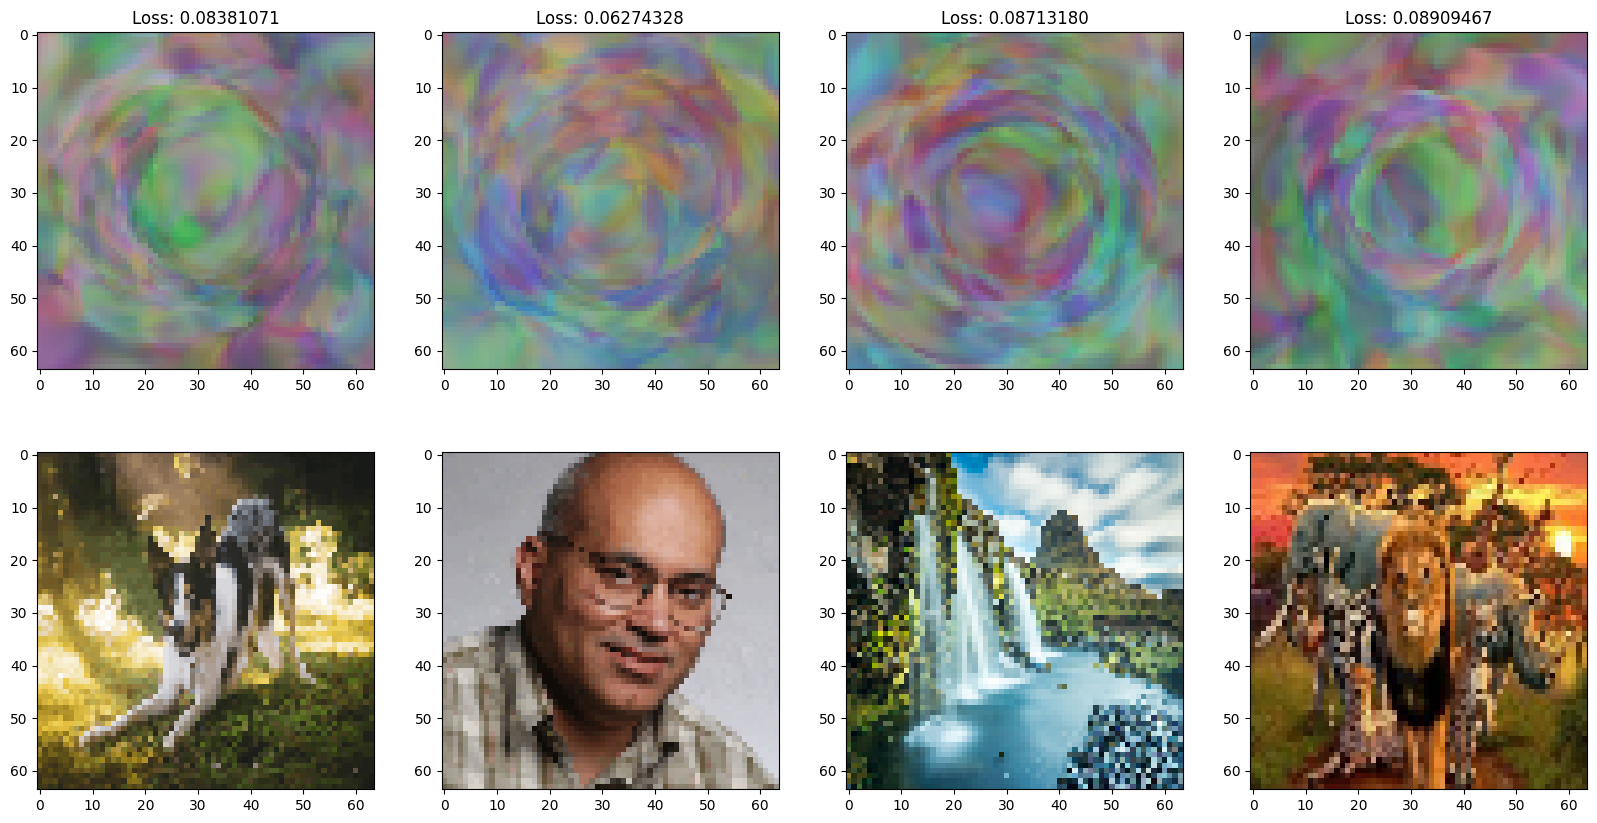

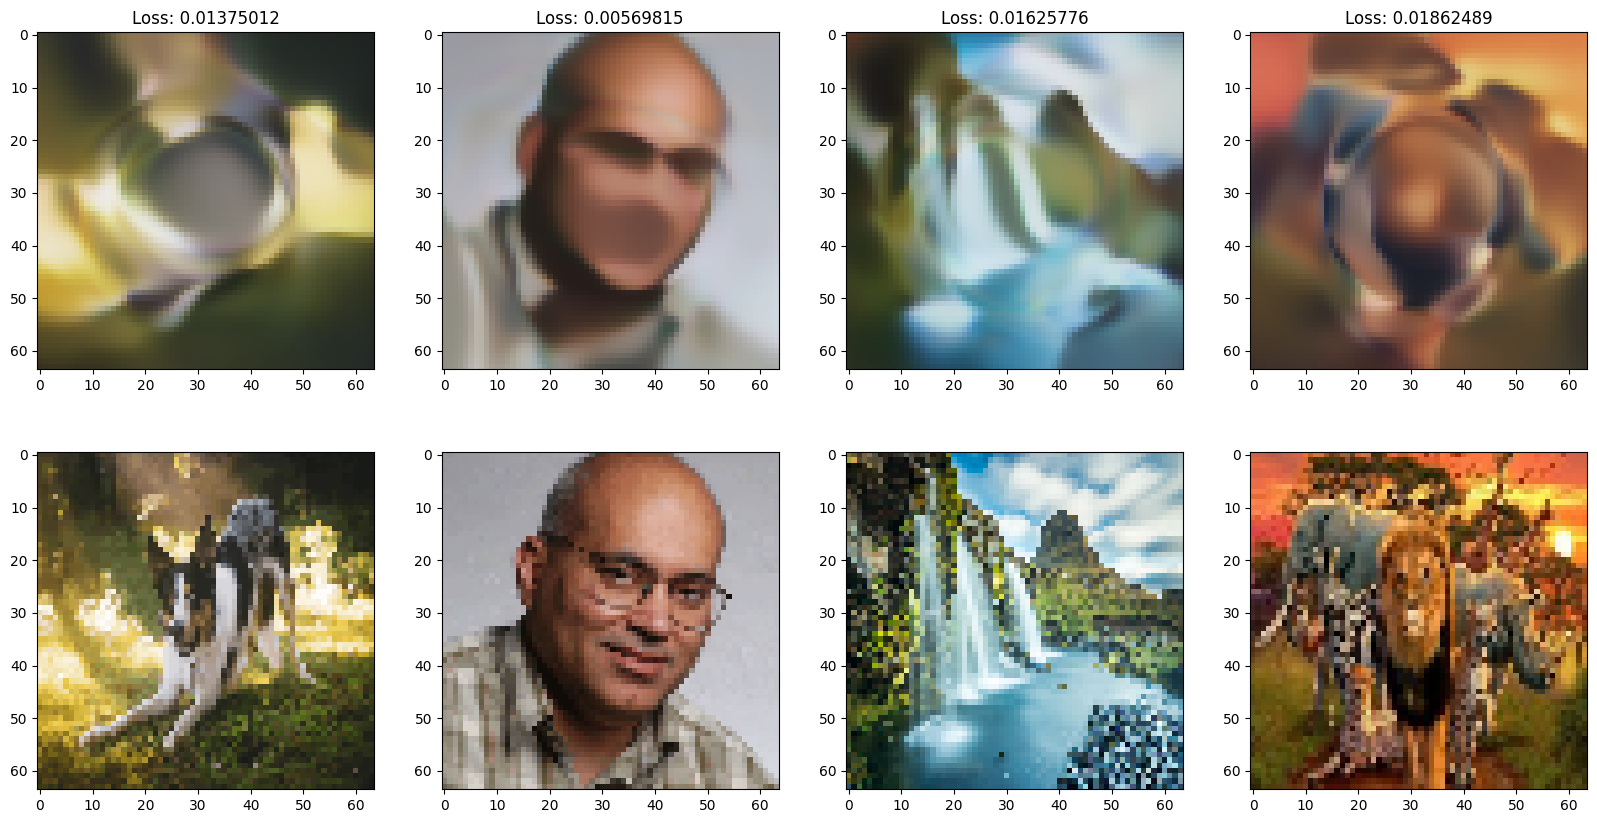

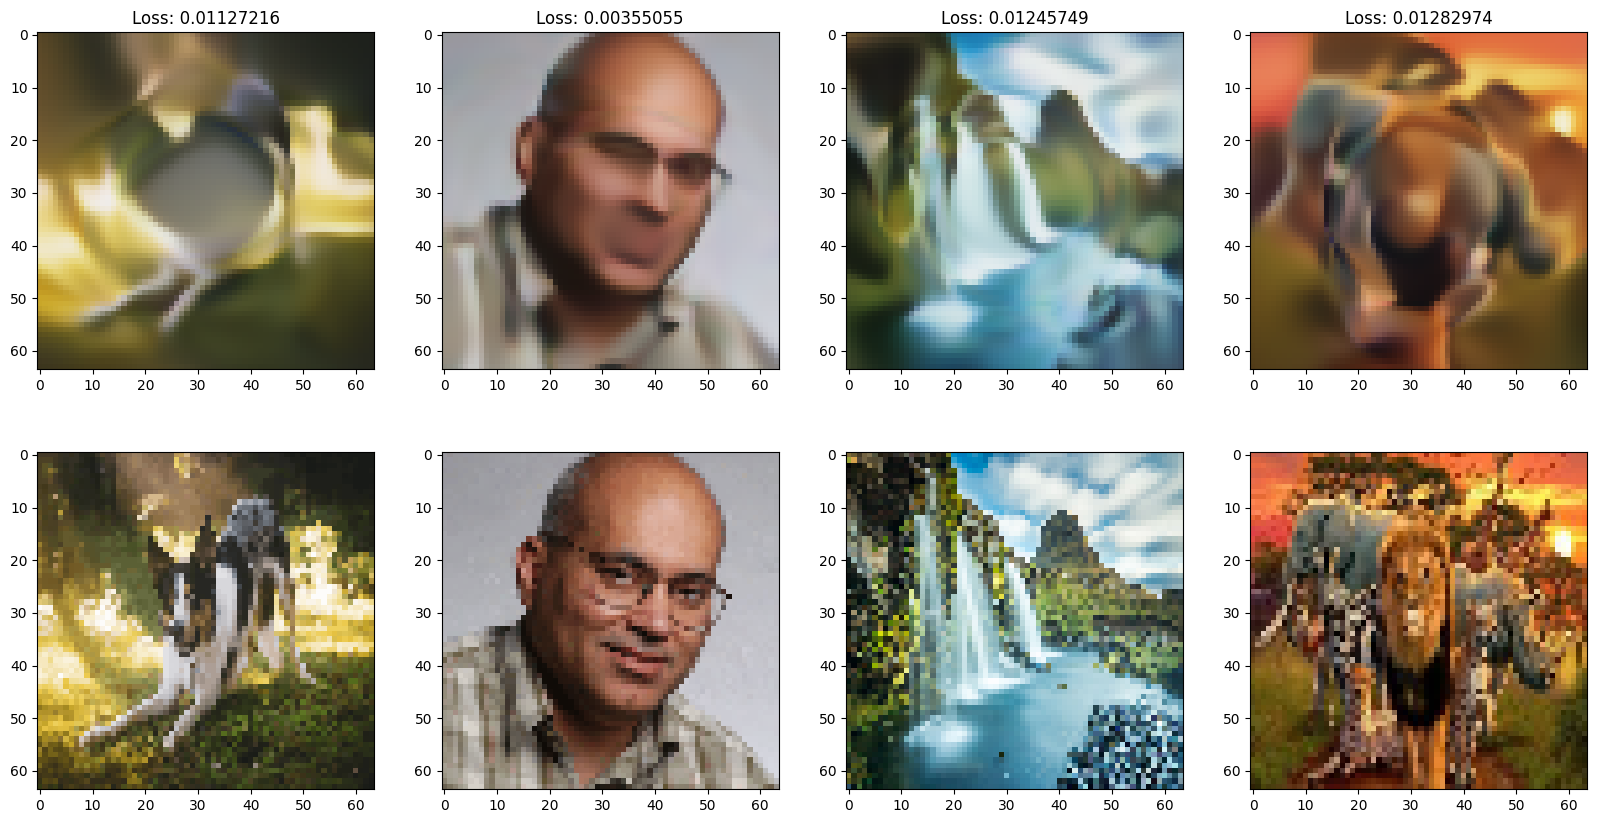

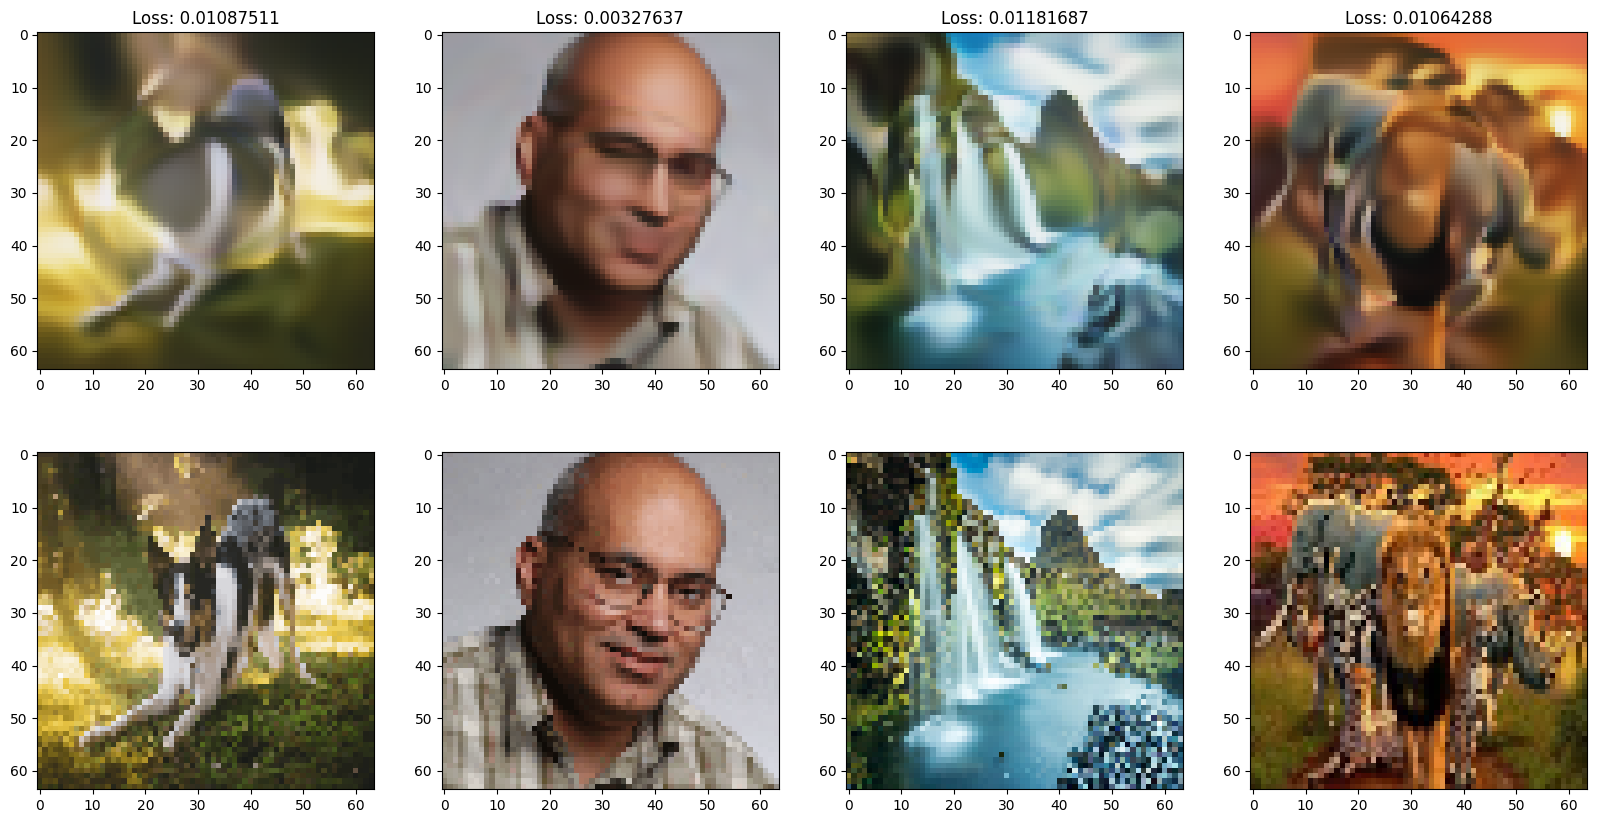

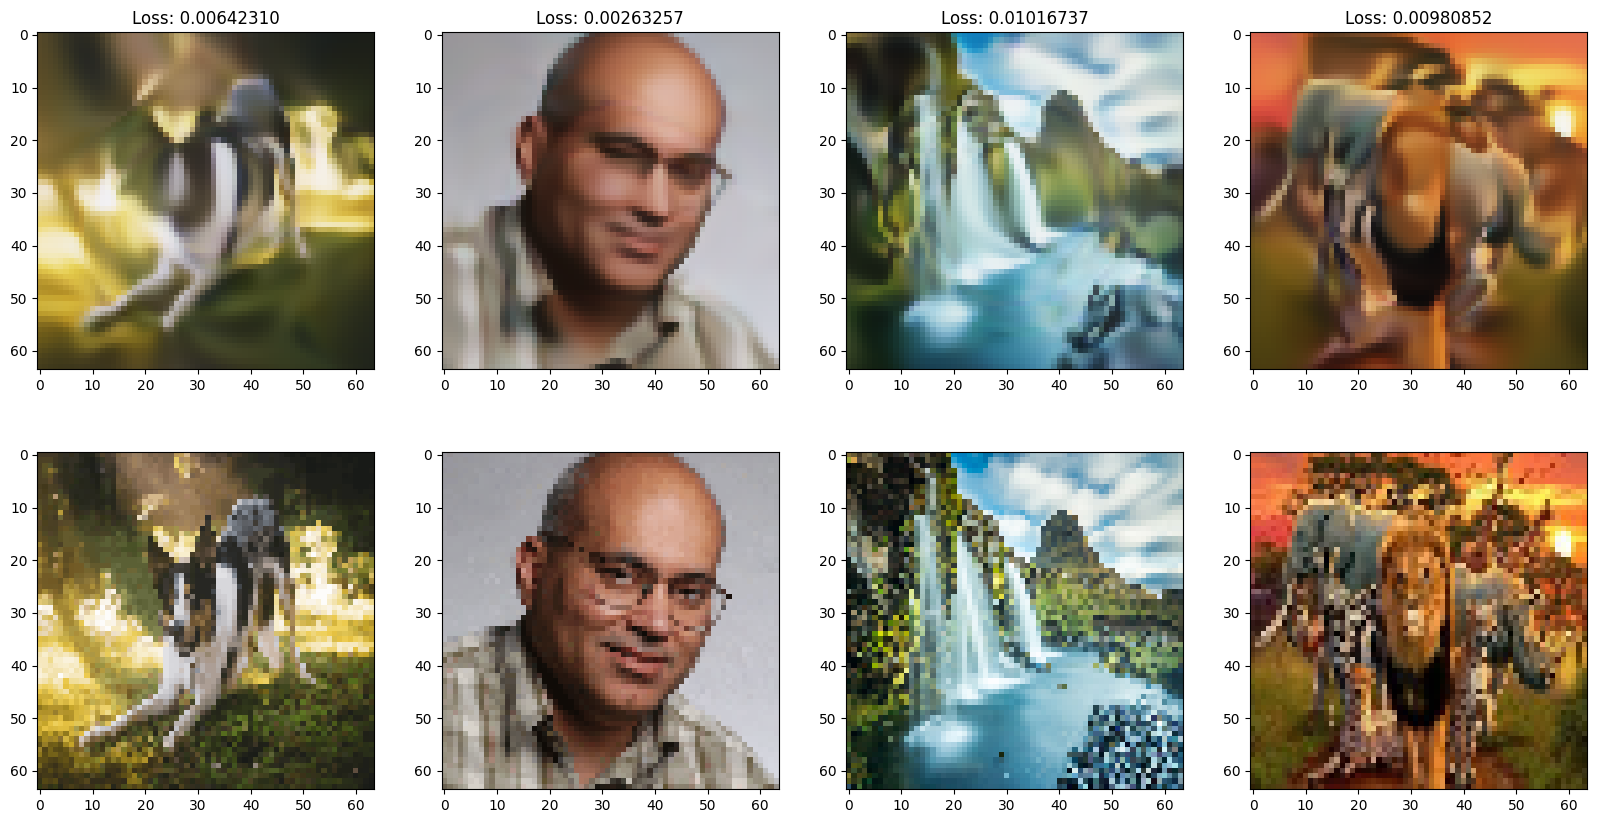

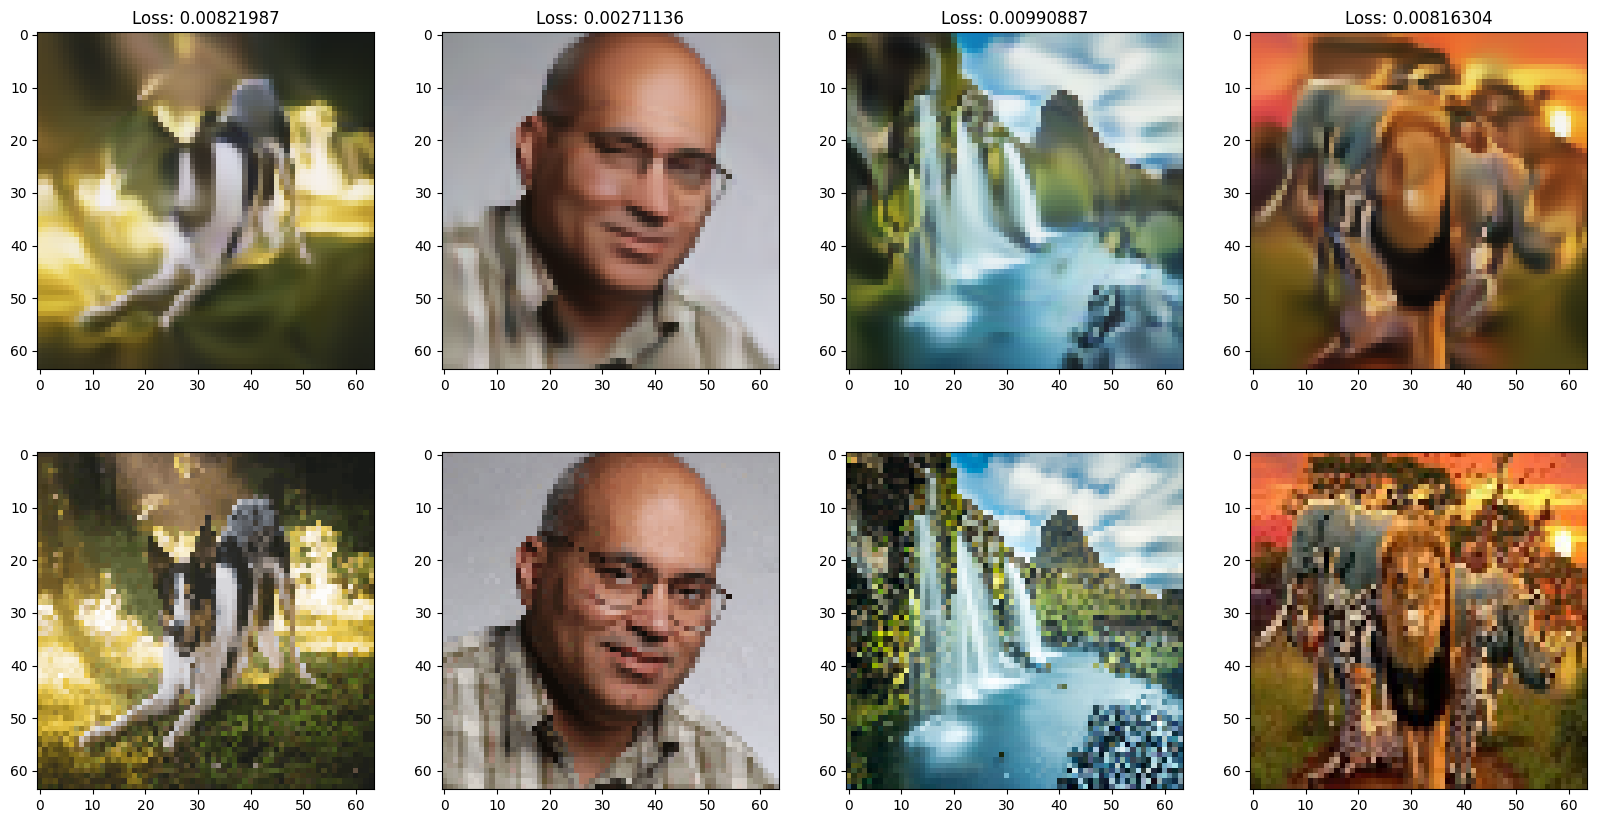

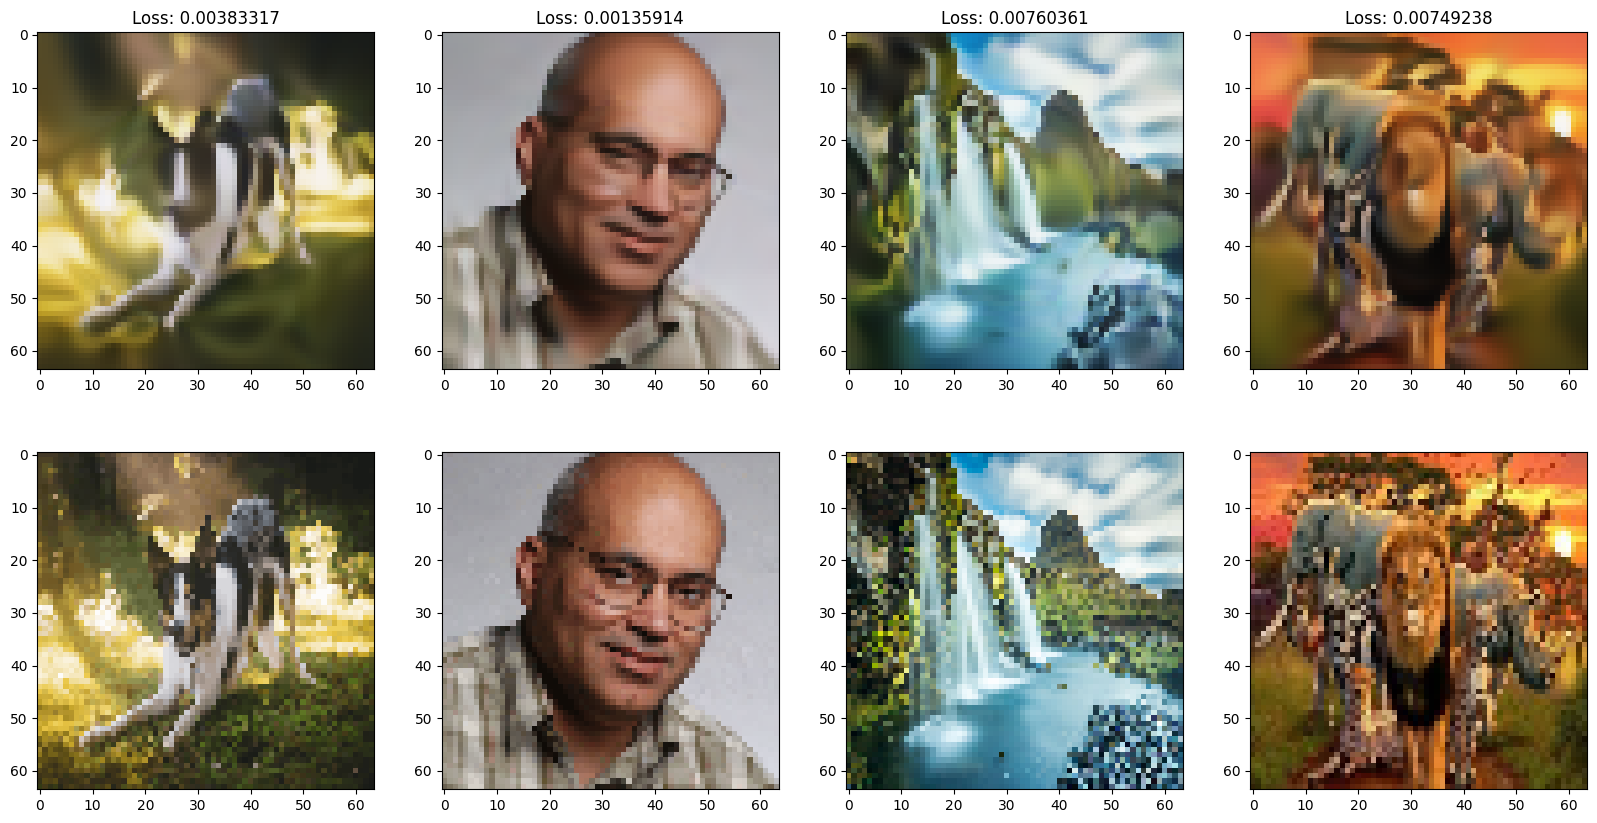

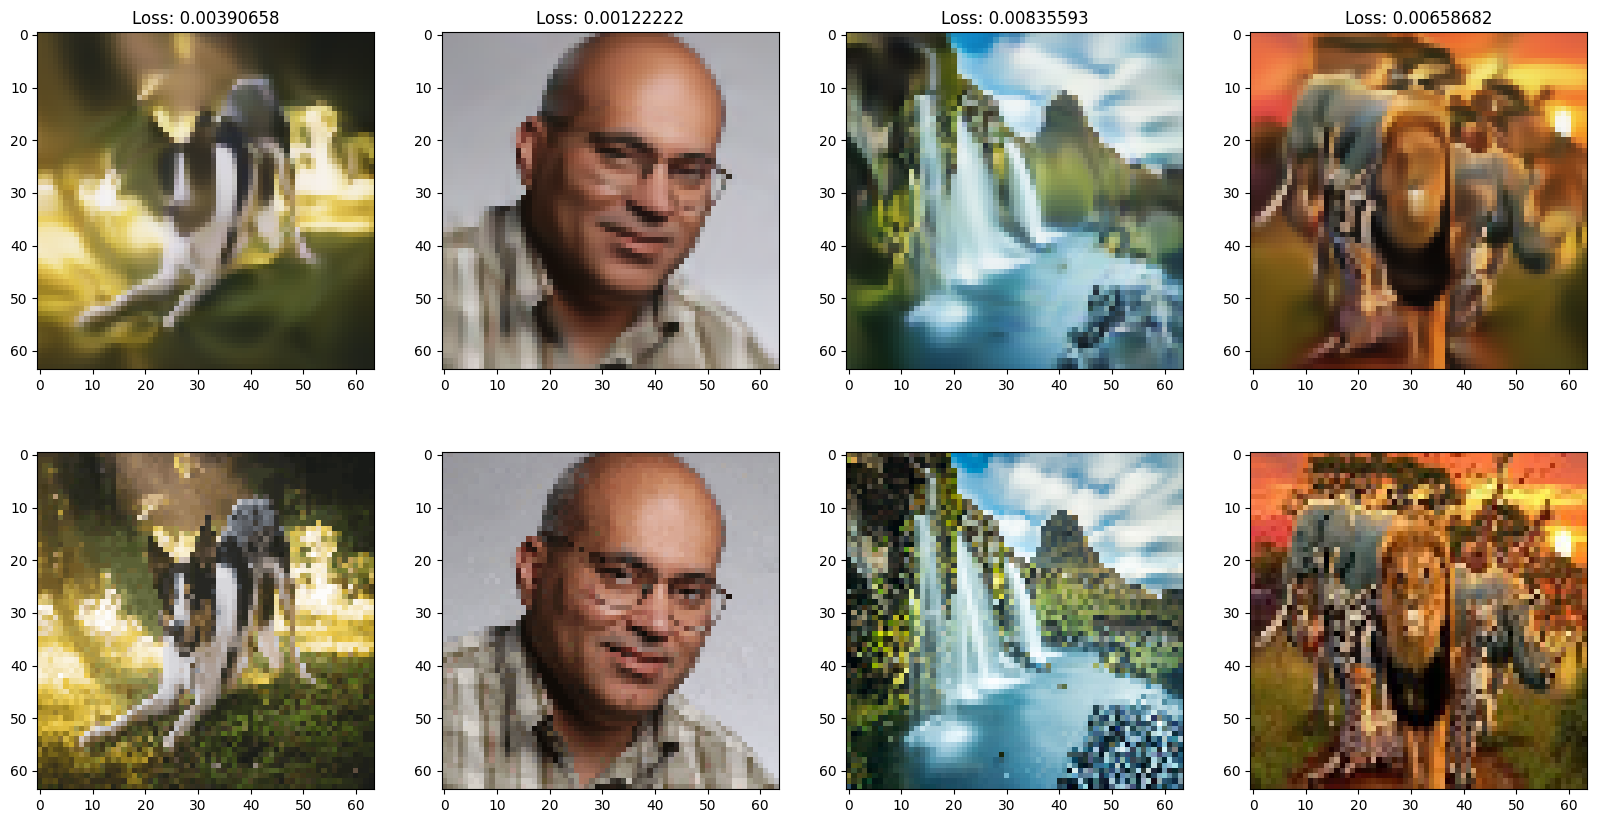

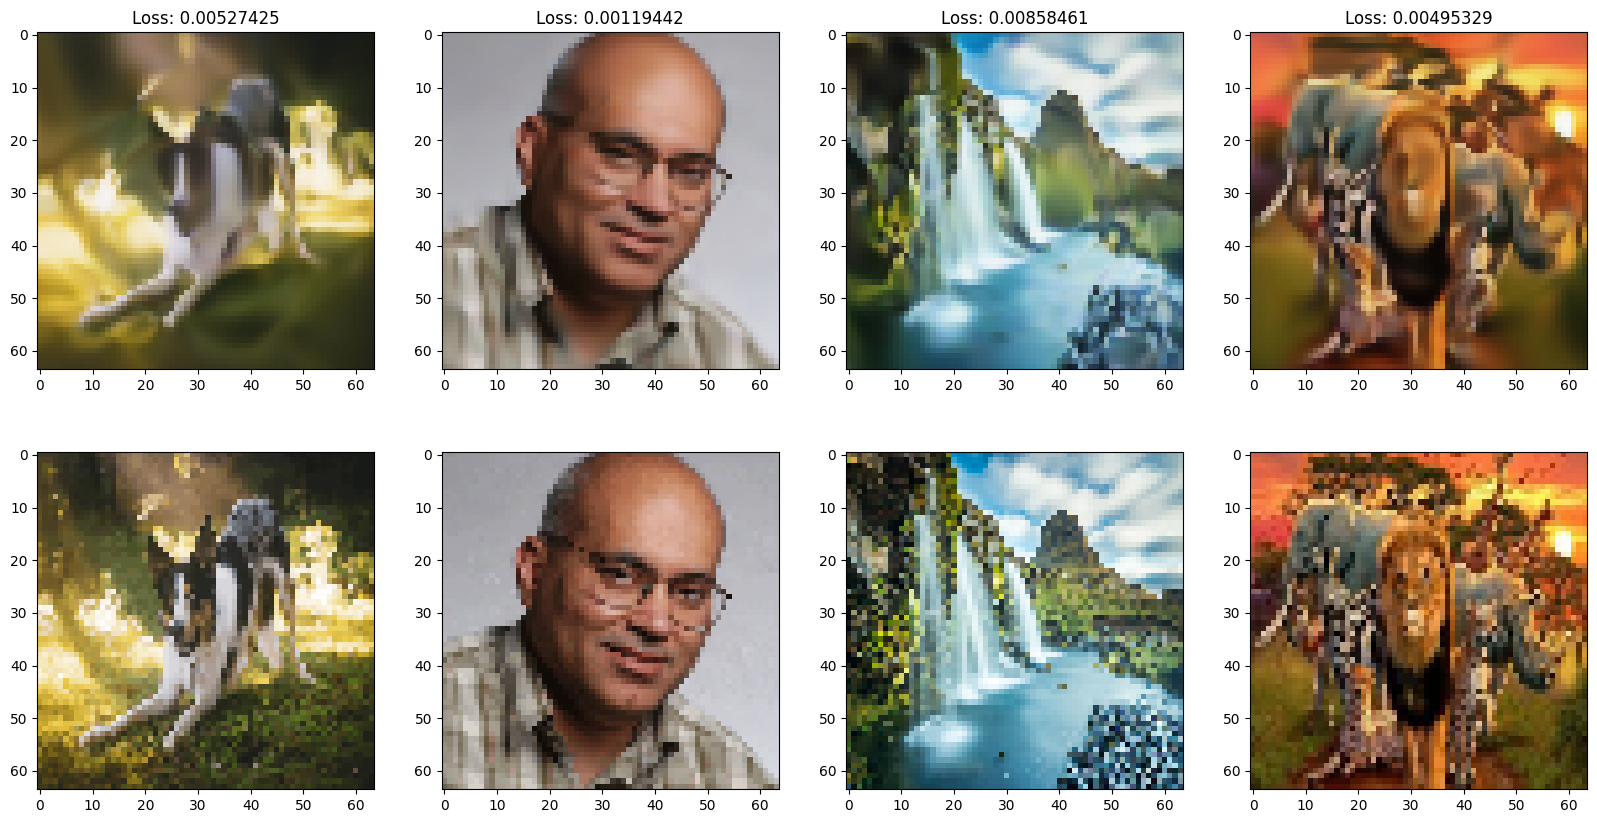

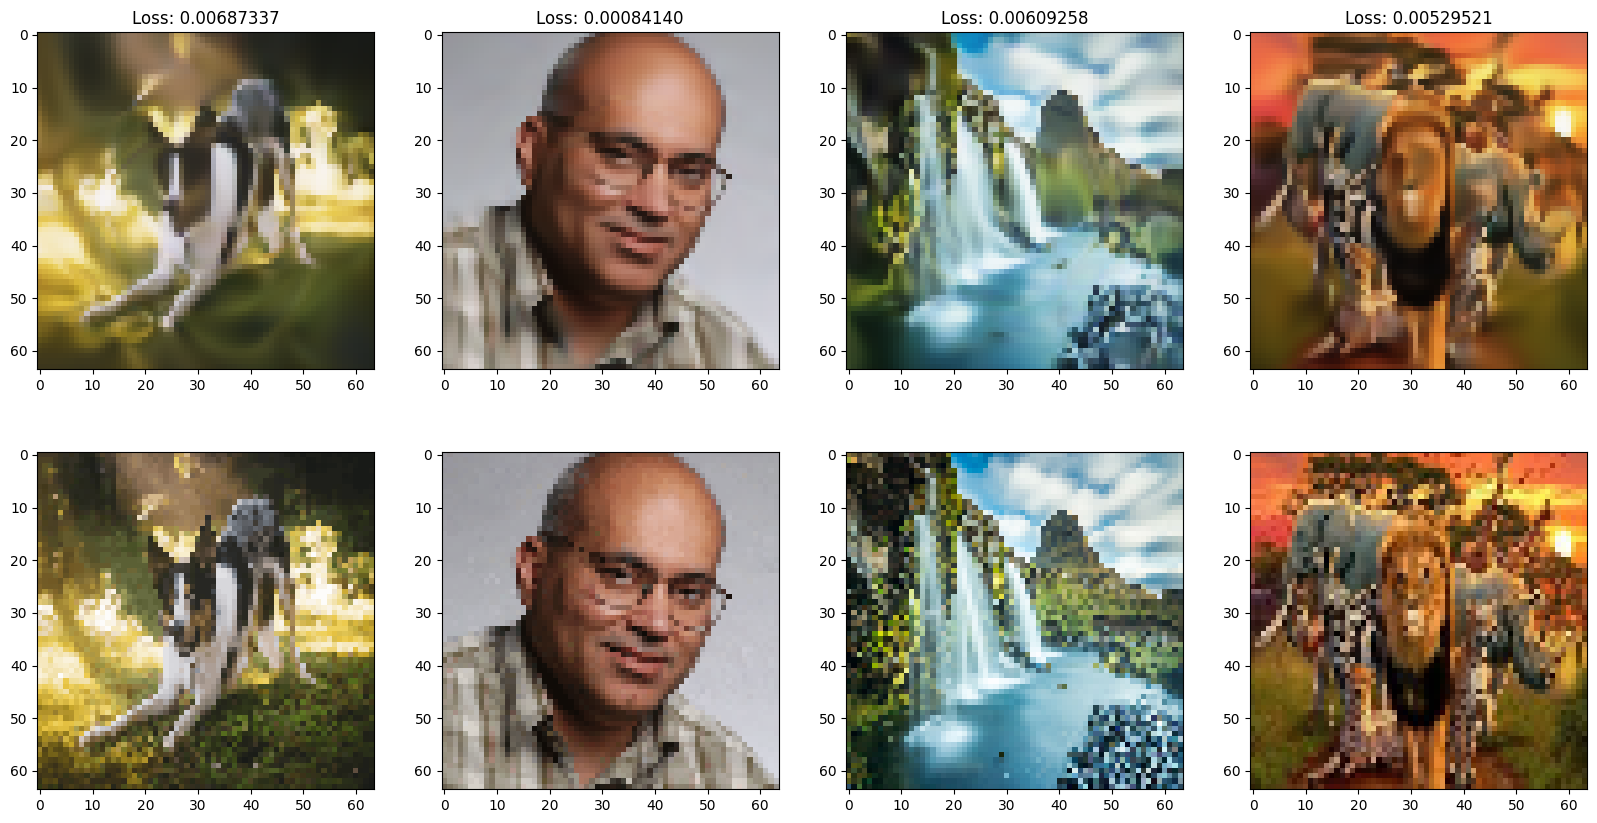

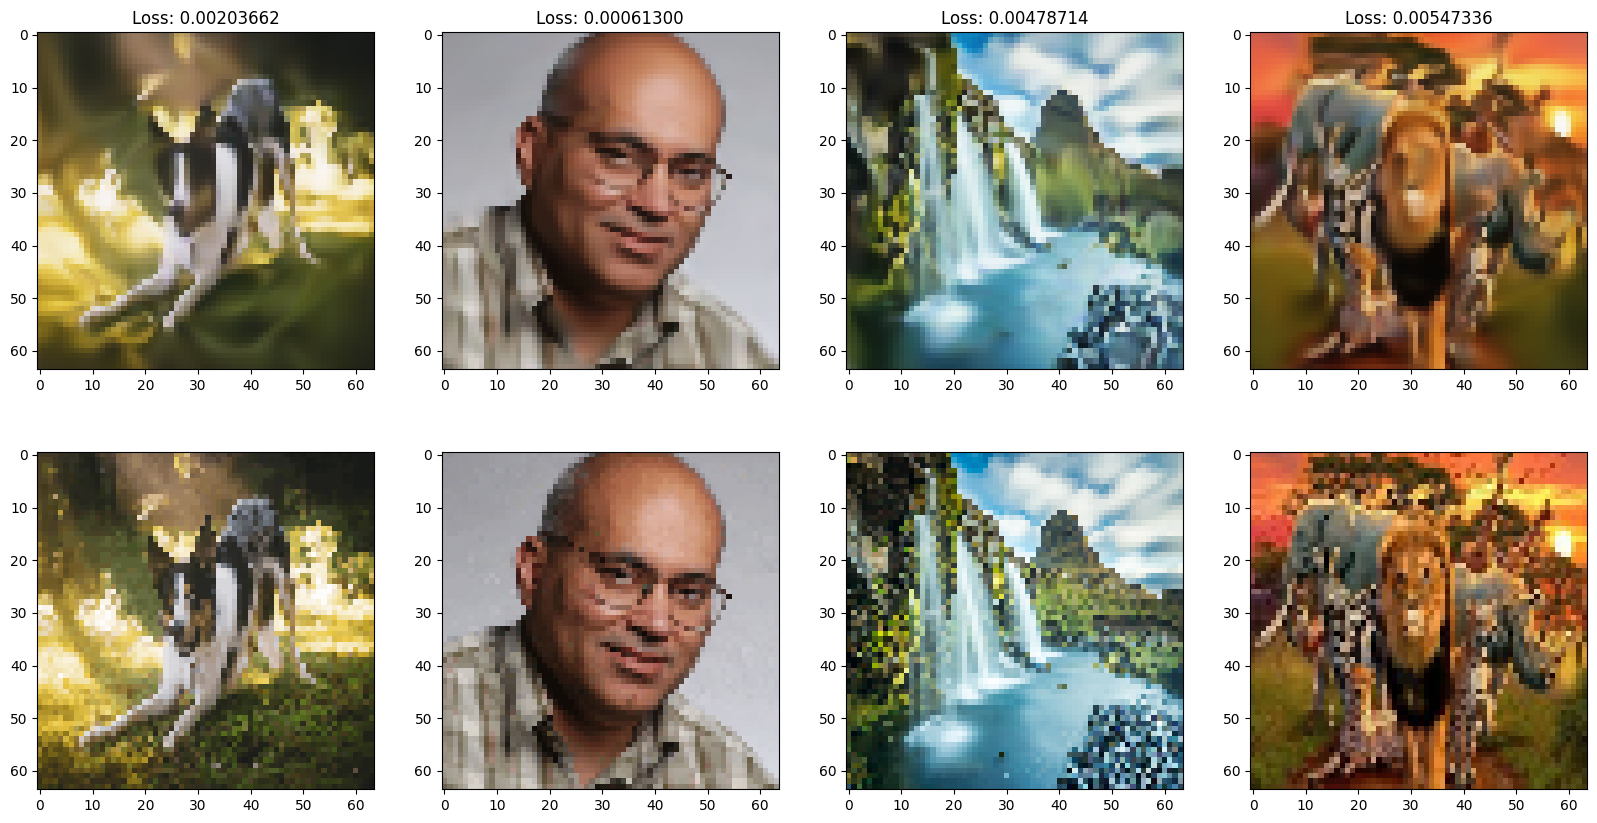

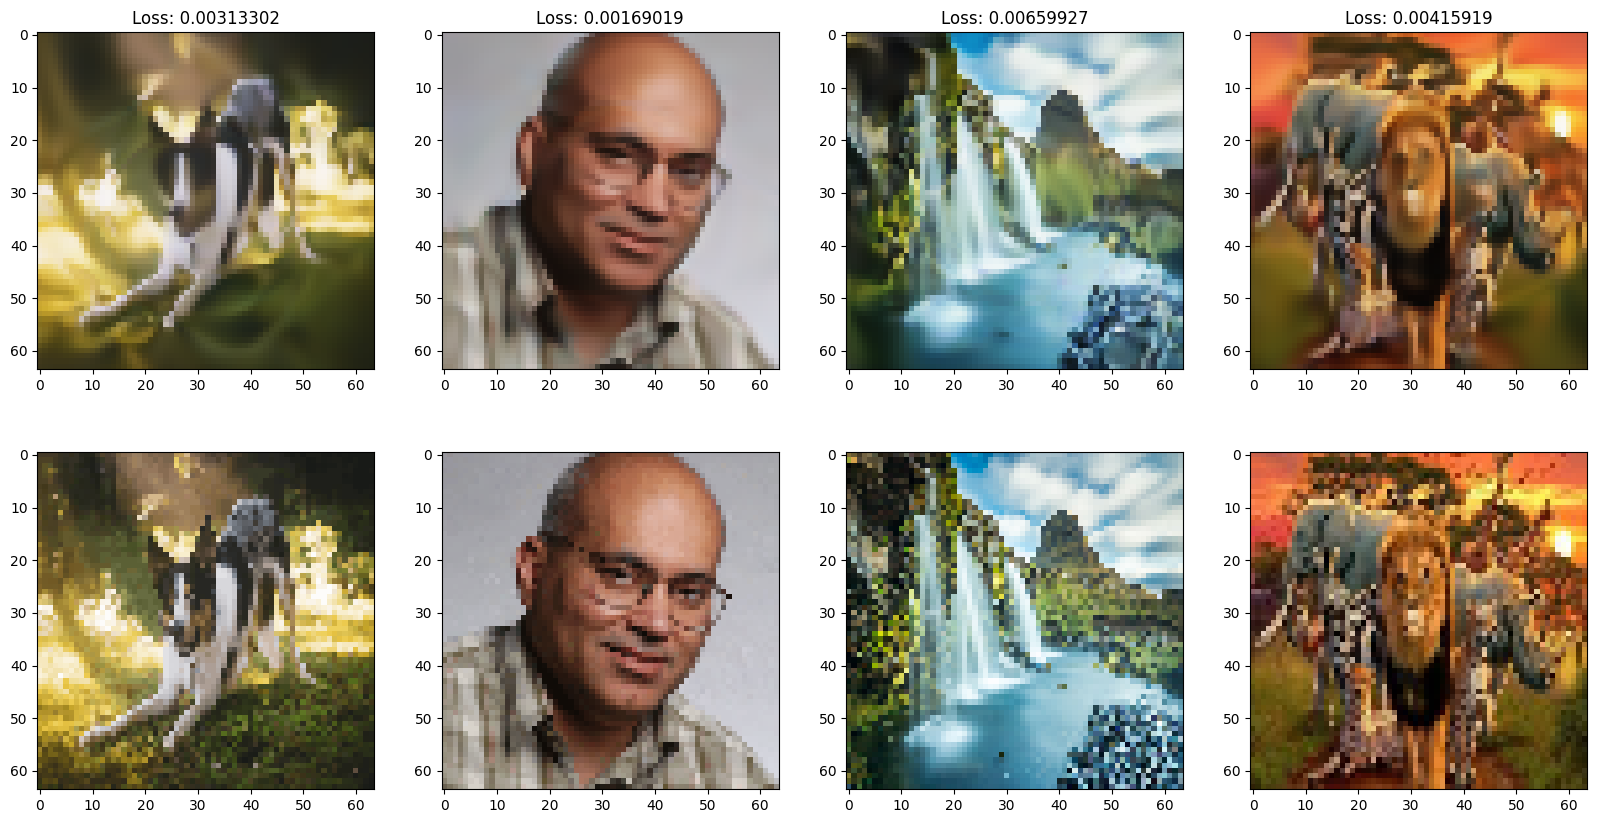

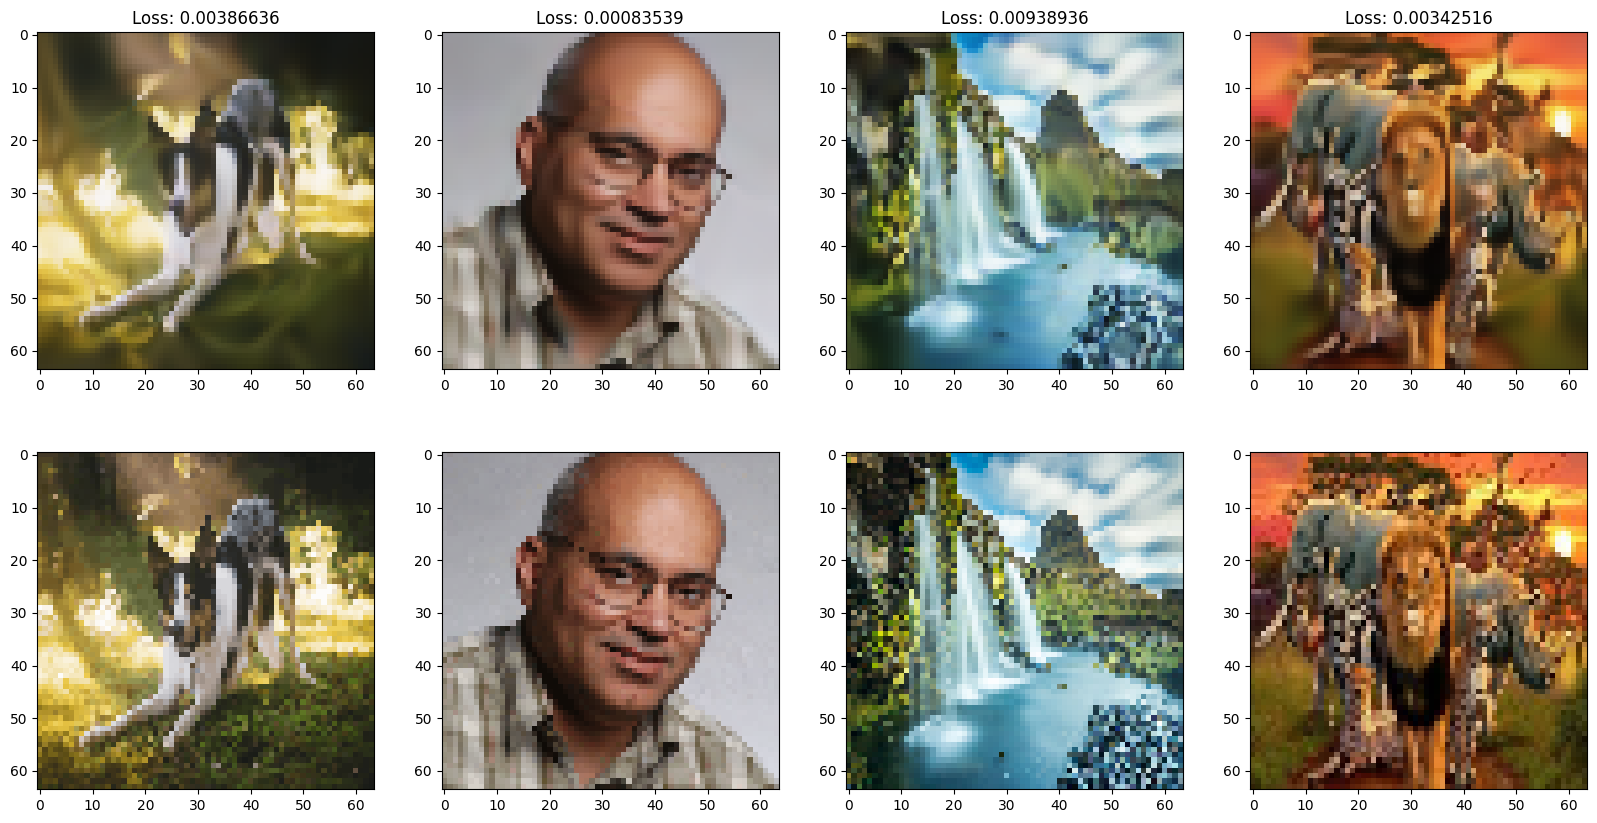

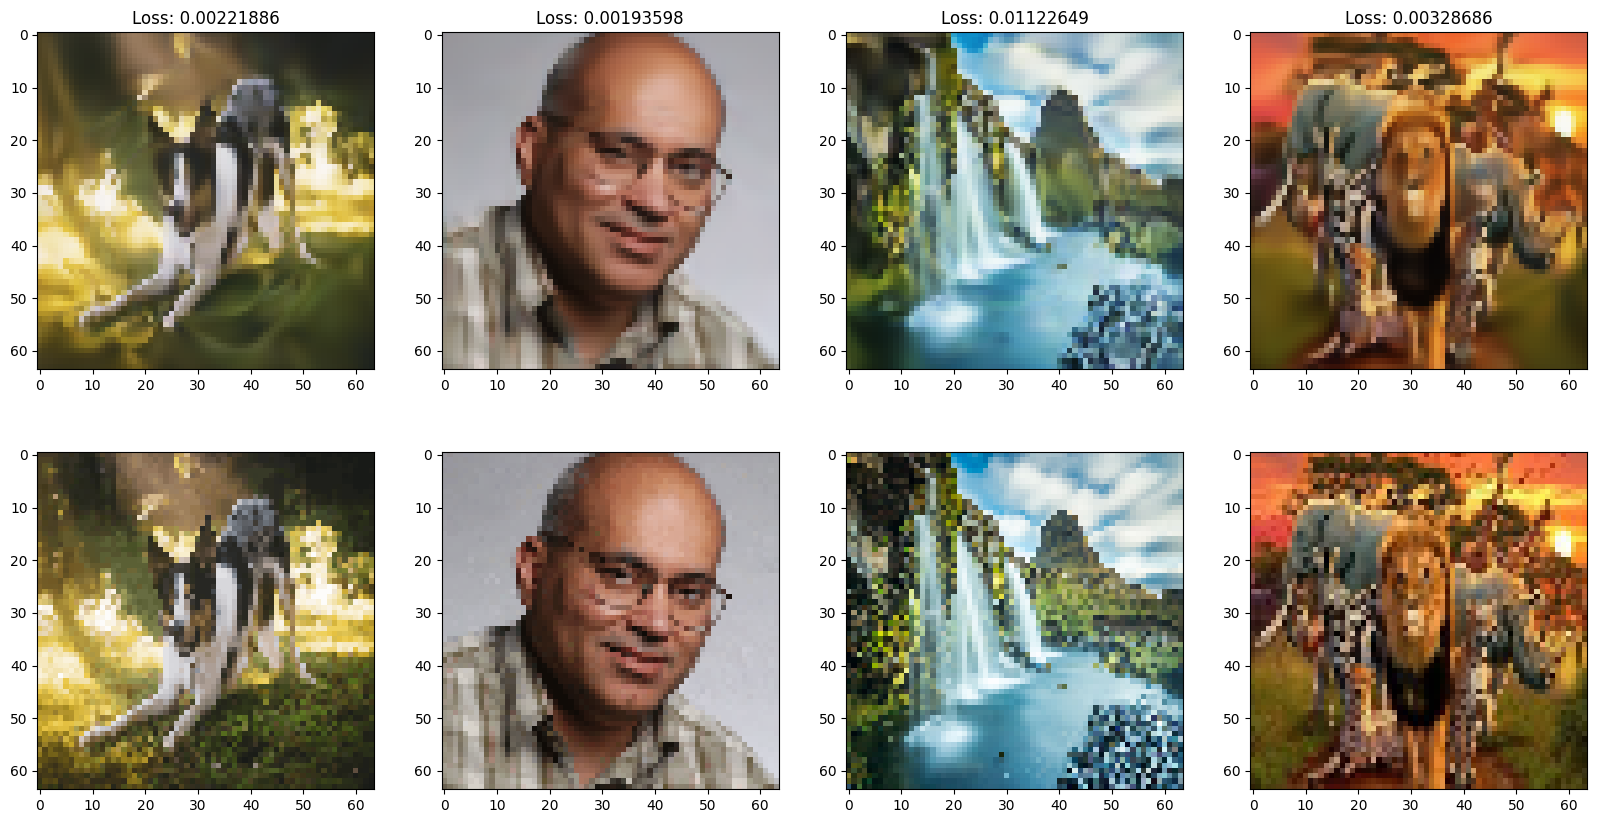

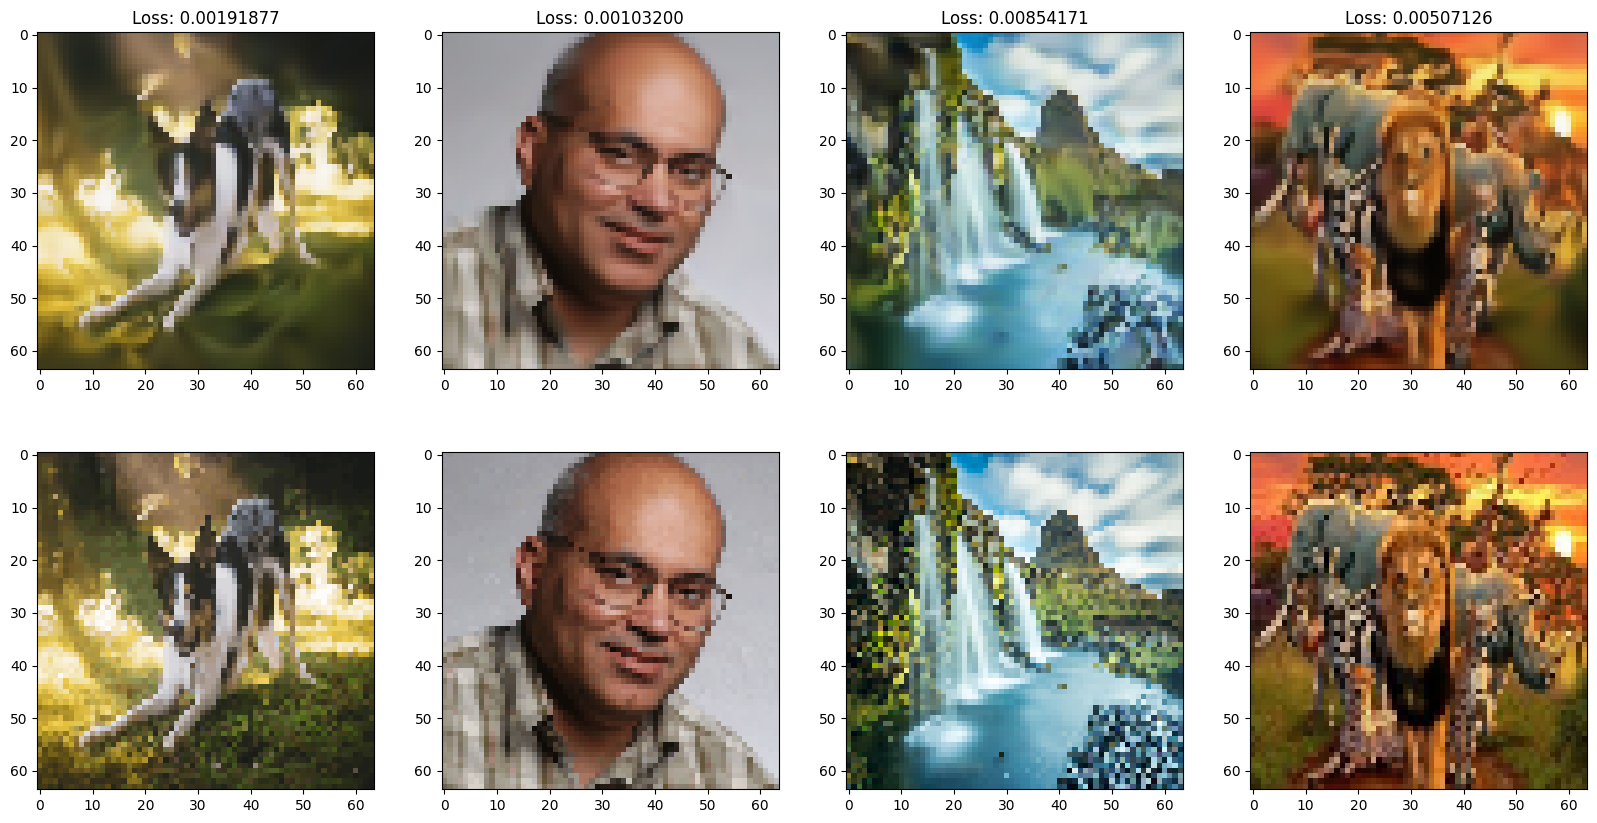

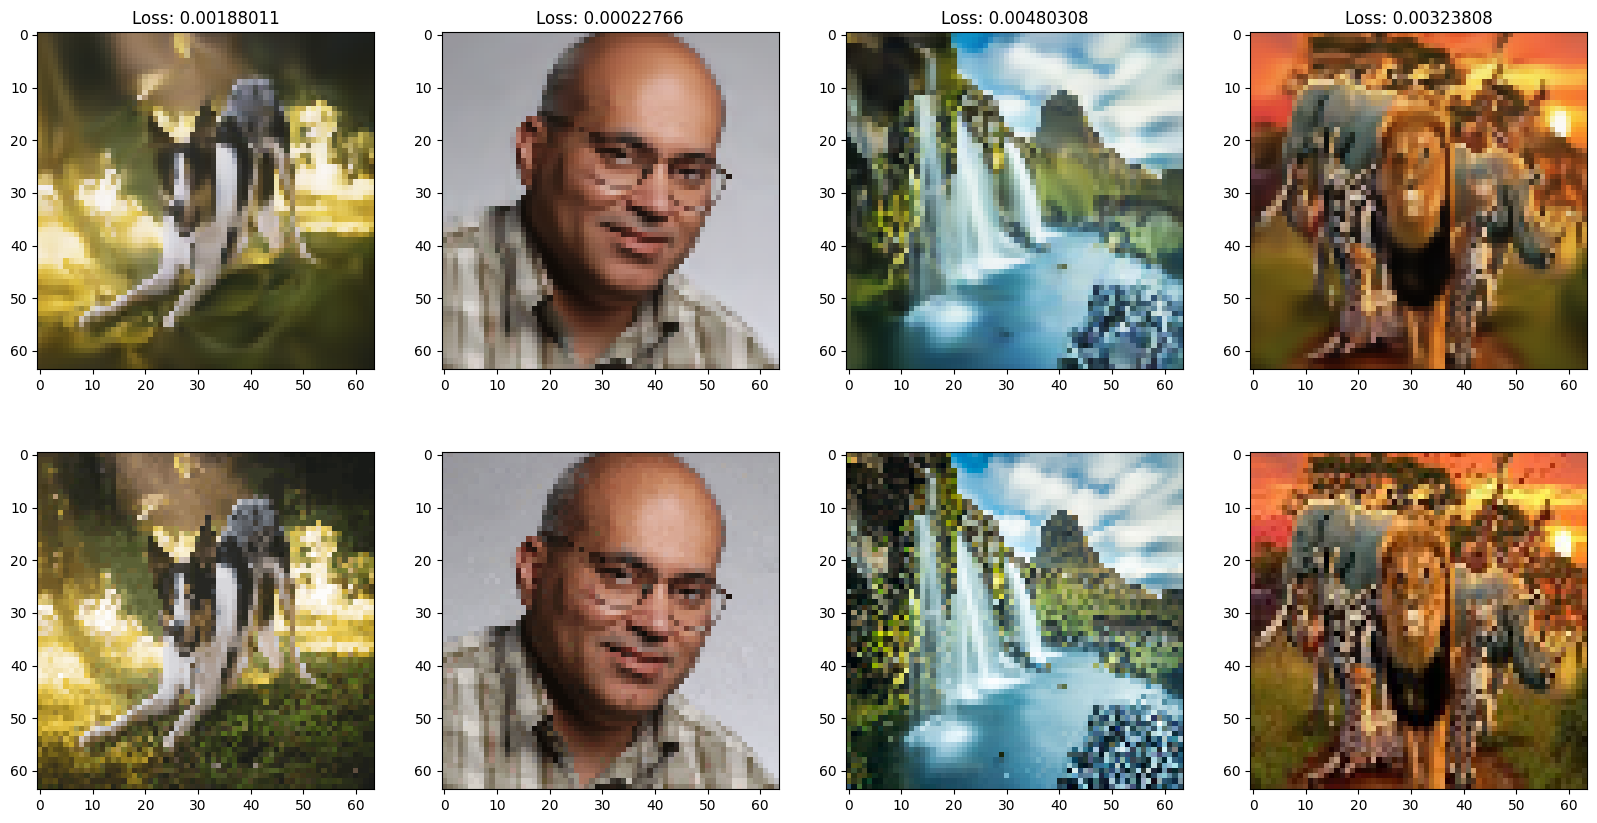

In [56]:
device = 'cuda:0'

img_size = (64, 64)
trans_load = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(img_size),
])

torch.manual_seed(3)
imgs = ['imgs/dog.png', 'imgs/malik.jpg', 'imgs/waterfall.jpg', 'imgs/animals.jpg']
targets = torch.stack([trans_load(plt.imread(img)[..., :3]) for img in imgs])
print(targets.shape)

cppn = ImageCPPN(n_hidden=100, n_layers=20, n_out_channels=3,
                 activation=torch.tanh, n_batches=len(targets), normalization='coordinate', residual=False)

cppn, targets = cppn.to(device), targets.to(device)
opt = torch.optim.Adam(cppn.parameters(), lr=1e-3)

for i_iteration in tqdm(range(800)):
    imgs = cppn.generate_image(img_size)
    
    loss = (imgs-targets).pow(2.).mean(dim=(-1, -2, -3))
    
    opt.zero_grad()
    loss.mean().backward()
    opt.step()
    
    if i_iteration%50==0:
        plt.figure(figsize=(len(imgs)*5, 2*5))
        for i_img, (l, x, y) in enumerate(zip(loss.tolist(), imgs, targets)):
            plt.subplot(2, len(imgs), i_img+1); plt.imshow(to_np(x.permute(1, 2, 0)))
            plt.title(f'Loss: {l:10.8f}')
            plt.subplot(2, len(imgs), i_img+1+len(imgs)); plt.imshow(to_np(y.permute(1, 2, 0)))
        plt.show()
        # plt.plot([layer.weight.grad.abs().mean().item() for layer in cppn.layers])
        # plt.show()

torch.Size([4, 3, 320, 320])


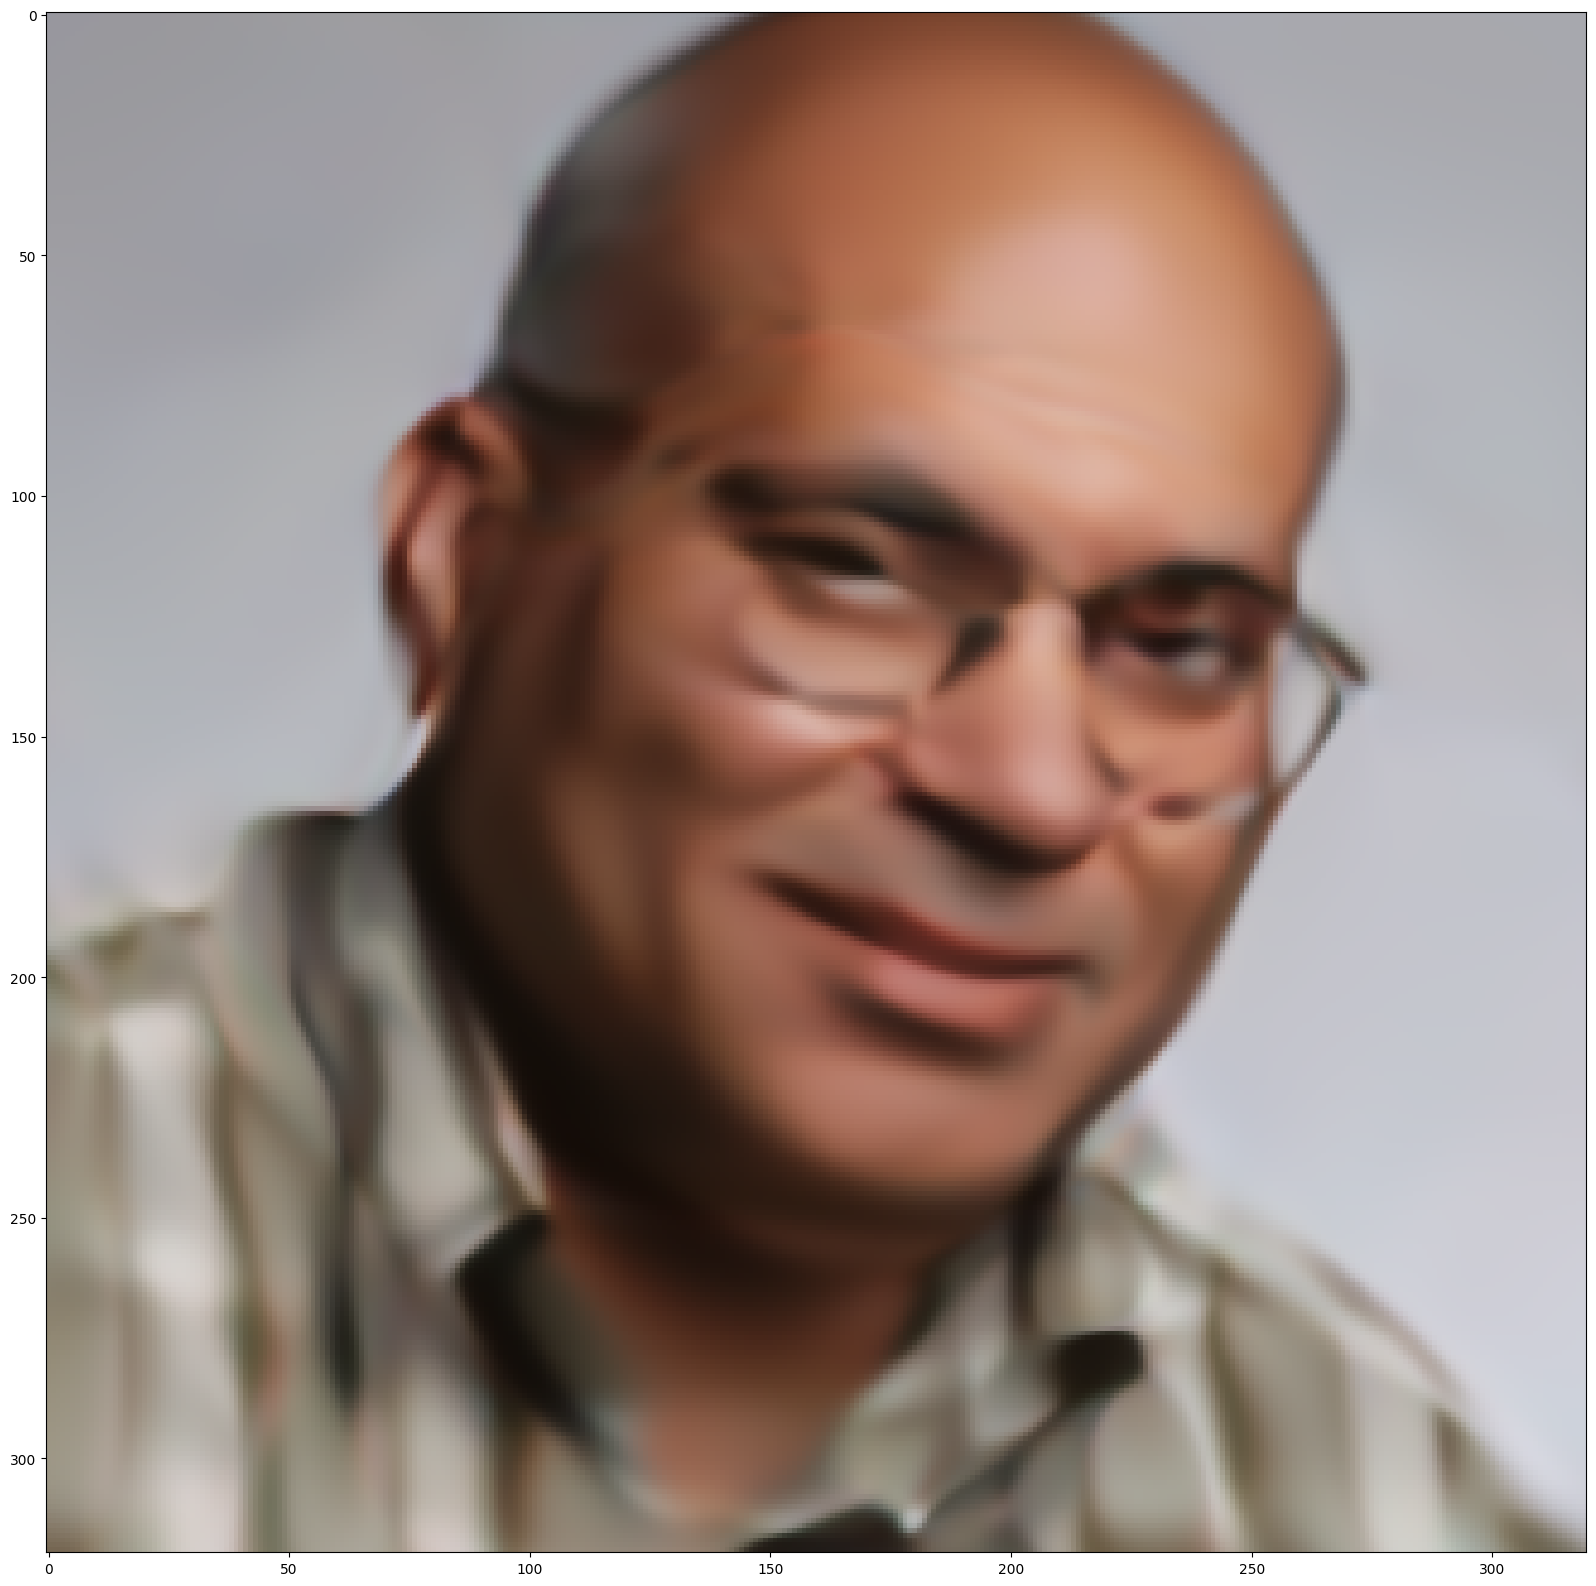

In [61]:
with torch.no_grad():
    a = cppn.generate_image((64*5, 64*5))
print(a.shape)
plt.figure(figsize=(20, 20))
plt.imshow(to_np(a[1].permute(1, 2, 0)))

In [3]:
from image_cppn import ImageCPPN

In [48]:
cppn = ImageCPPN(n_batches=10)

count_params(cppn)
cppn.to(device)

ImageCPPN(
  (layers): ModuleList(
    (0): Conv2d(30, 240, kernel_size=(1, 1), stride=(1, 1), groups=10)
    (1): Conv2d(240, 240, kernel_size=(1, 1), stride=(1, 1), groups=10)
    (2): Conv2d(240, 240, kernel_size=(1, 1), stride=(1, 1), groups=10)
    (3): Conv2d(240, 240, kernel_size=(1, 1), stride=(1, 1), groups=10)
    (4): Conv2d(240, 240, kernel_size=(1, 1), stride=(1, 1), groups=10)
    (5): Conv2d(240, 240, kernel_size=(1, 1), stride=(1, 1), groups=10)
    (6): Conv2d(240, 240, kernel_size=(1, 1), stride=(1, 1), groups=10)
    (7): Conv2d(240, 240, kernel_size=(1, 1), stride=(1, 1), groups=10)
    (8): Conv2d(240, 30, kernel_size=(1, 1), stride=(1, 1), groups=10)
  )
)

In [40]:
sd = cppn.get_instance_state_dict(0)

In [41]:
cppn.load_instance_state_dict(sd, 5)

In [50]:
cppn.generate_image();

In [42]:
for i in range(10):
    print(cppn.get_instance_state_dict()[i]['layers.3.weight'].sum())

tensor(-0.1367)
tensor(1.6557)
tensor(2.9409)
tensor(-1.7116)
tensor(-1.3352)
tensor(-0.1367)
tensor(-8.2343)
tensor(3.9761)
tensor(-1.9627)
tensor(0.6055)


In [51]:
generate_input((4024, 4024), 1);

In [52]:
generate_input((224, 224), 1);

In [55]:
'affine' in 'layeraffine'

True

torch.Size([1, 10])

In [84]:
torch.manual_seed(0)
K = torch.randn(10, 512)
Q = torch.randn(1, 512)


beta = torch.randn(1, 10).requires_grad_()
opt = torch.optim.Adam([beta], lr=1e-1)

for i in range(1000):
    Qp = (beta.softmax(dim=-1)@K)
    loss = (Qp-Q).pow(2.).mean()
    
    opt.zero_grad()
    loss.backward()
    opt.step()
    if i%100==0:
        print(loss.item())

1.614910364151001
1.1830068826675415
1.1828621625900269
1.1828621625900269
1.1828621625900269
1.1828621625900269
1.1828620433807373
1.1828621625900269
1.1828620433807373
1.1828620433807373


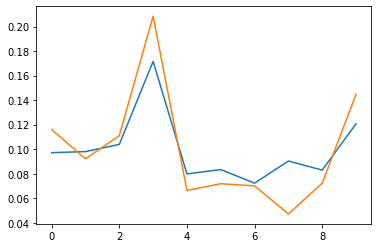

In [97]:
plt.plot((Q@K.T*.01).softmax(dim=-1).numpy()[0])
plt.plot(beta.softmax(dim=-1).detach().numpy()[0])